In [ ]:
# Upload the file
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv("heart.csv")

In [ ]:
# Basic Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df["target"]

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Numerical & categorical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print(numerical_cols)
print(categorical_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


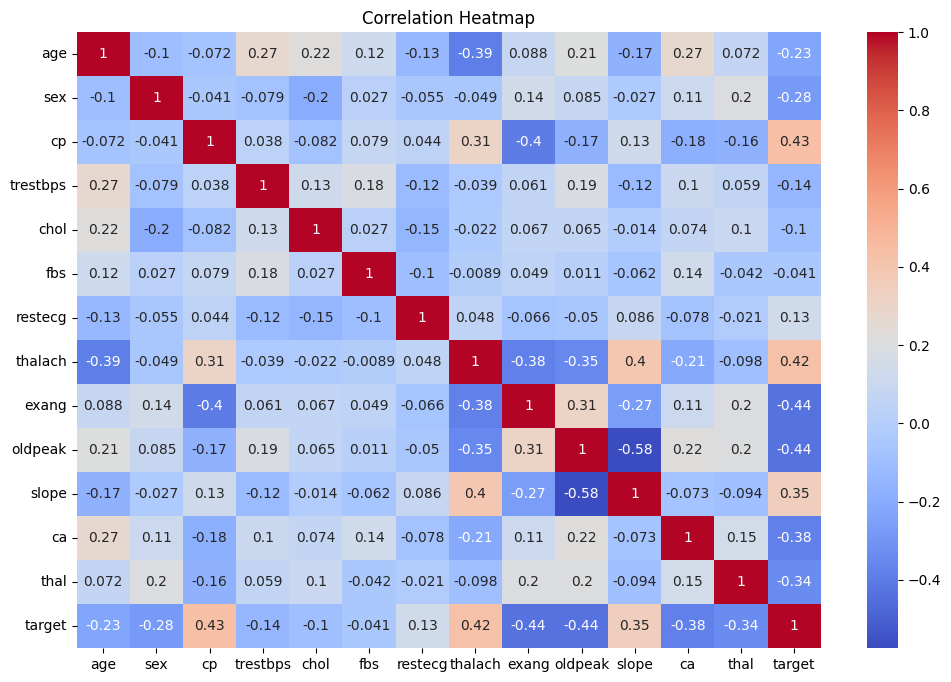

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

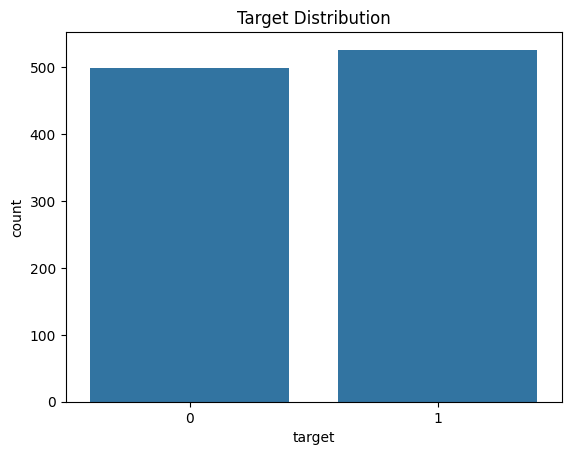

In [ ]:
# Target variable count
sns.countplot(data=df, x='target')
plt.title("Target Distribution")
plt.show()

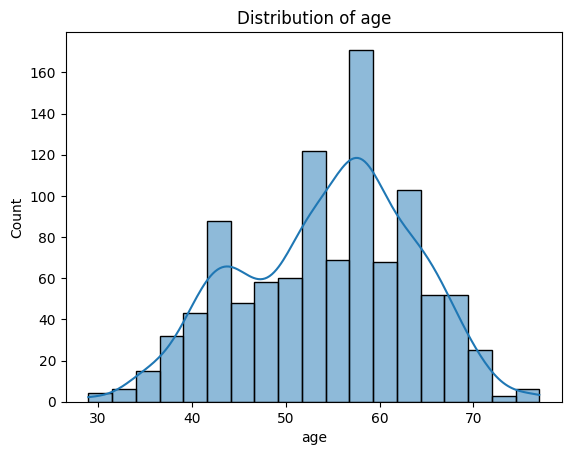

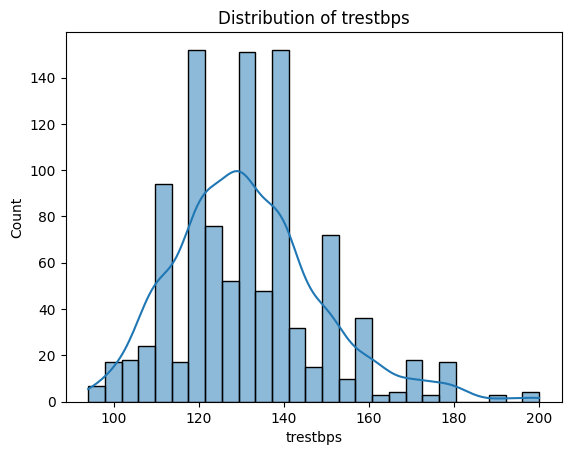

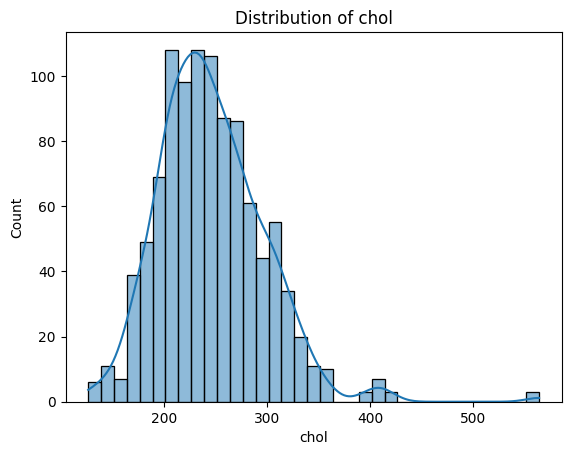

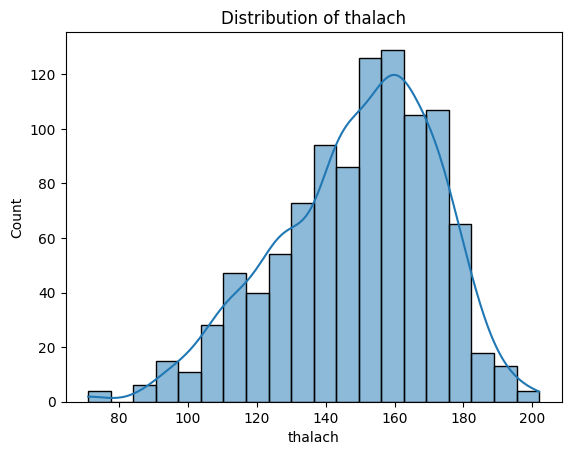

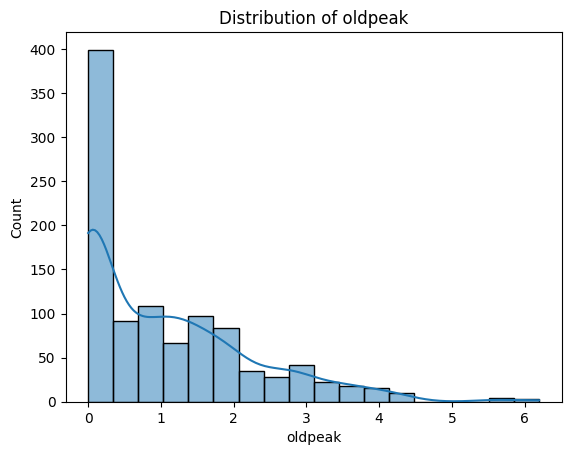

In [ ]:
# Numerical columns
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    print()

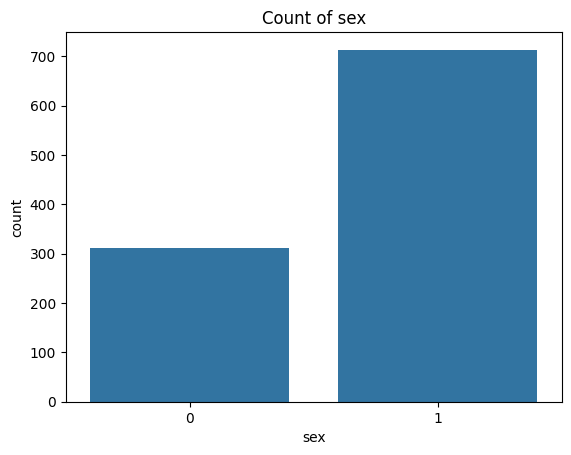

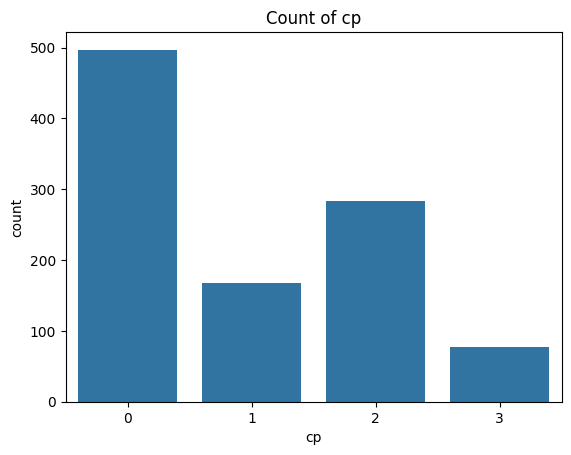

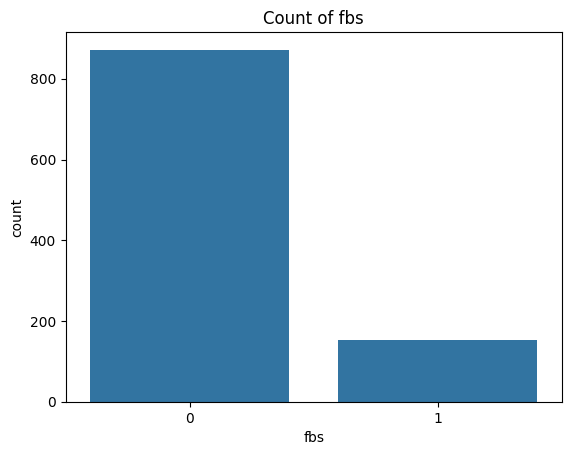

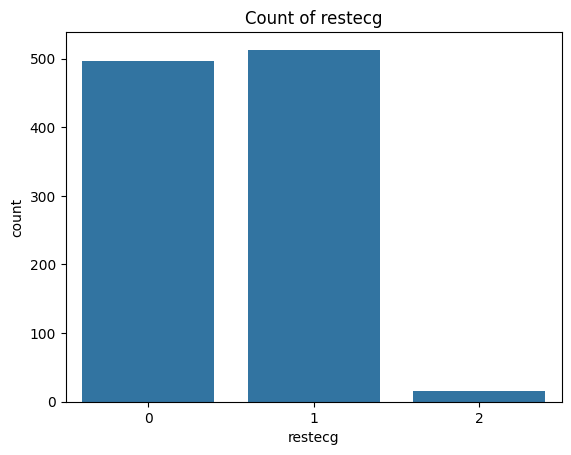

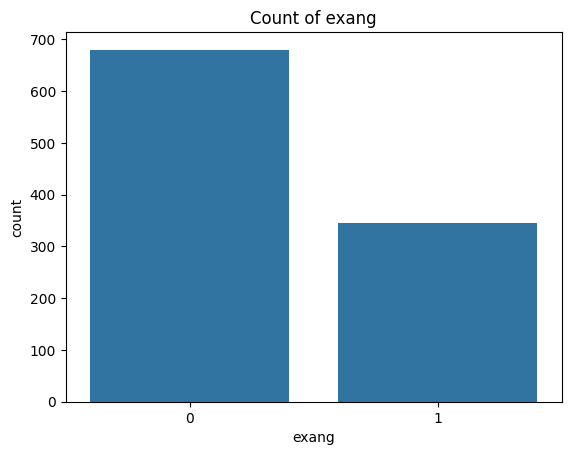

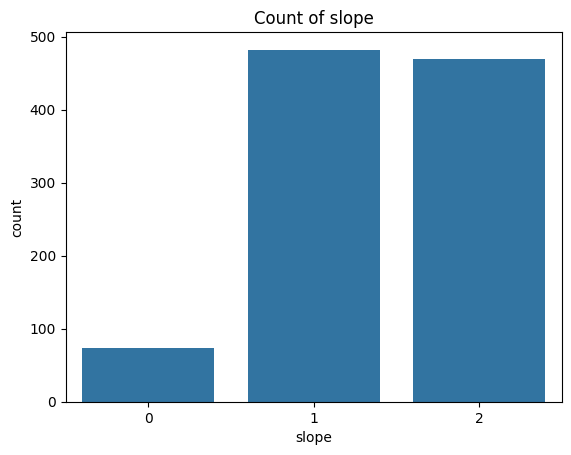

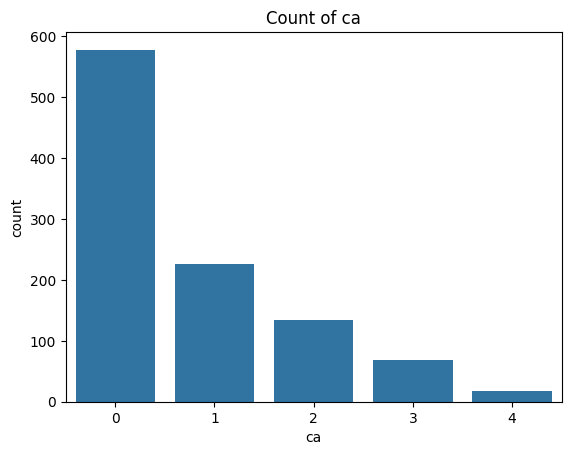

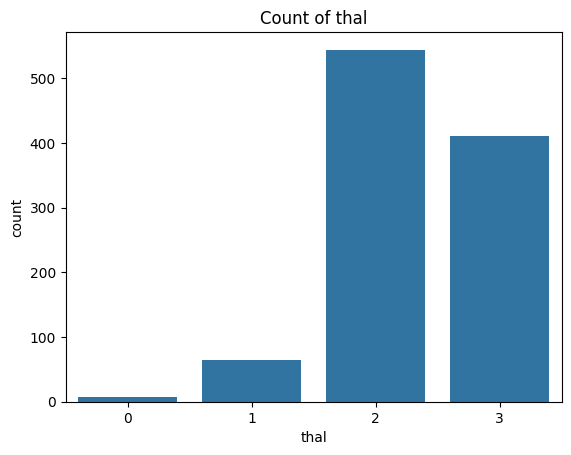

In [ ]:
# Count Plot
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

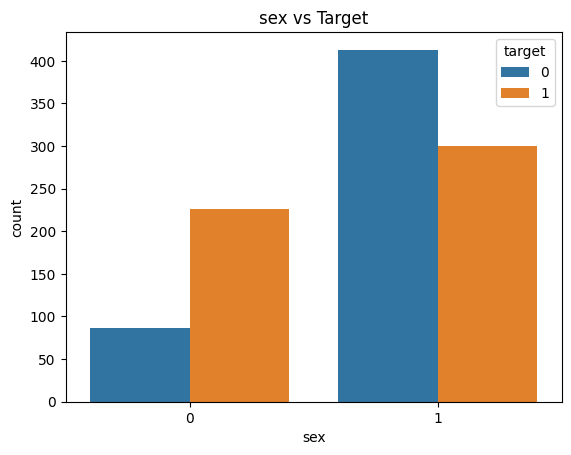

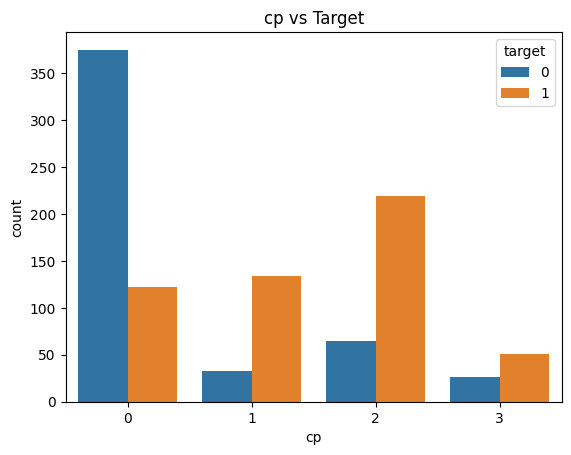

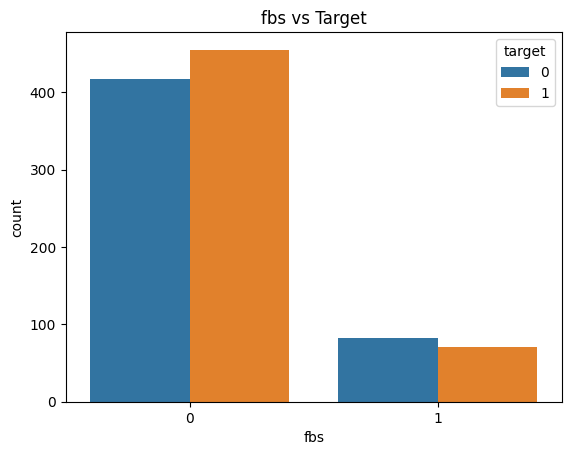

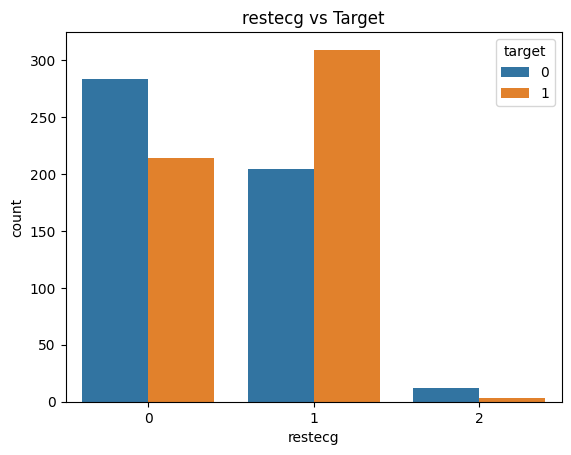

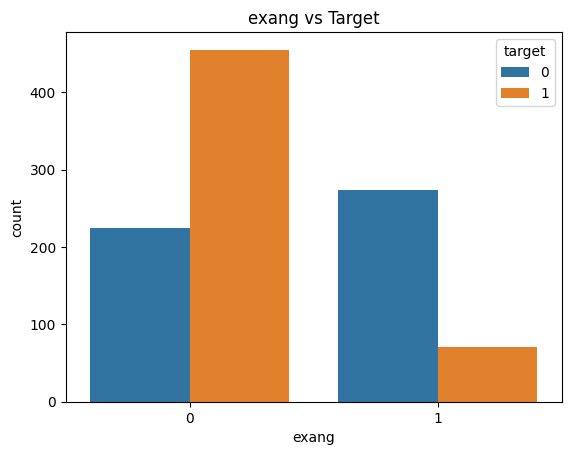

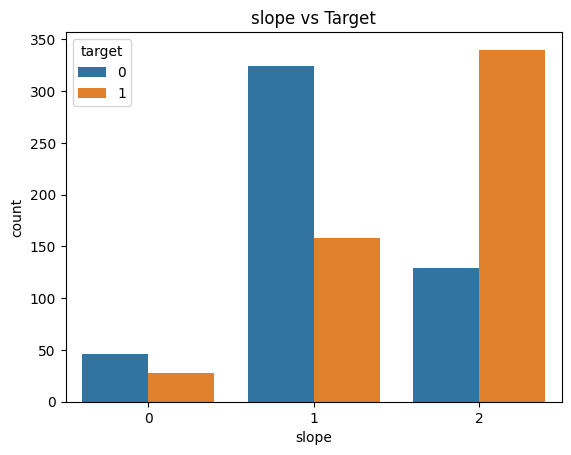

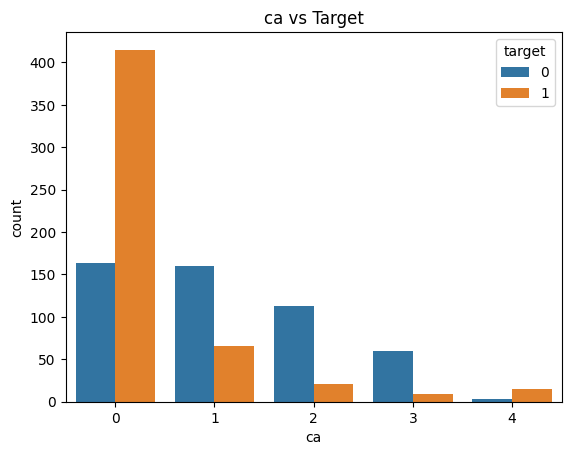

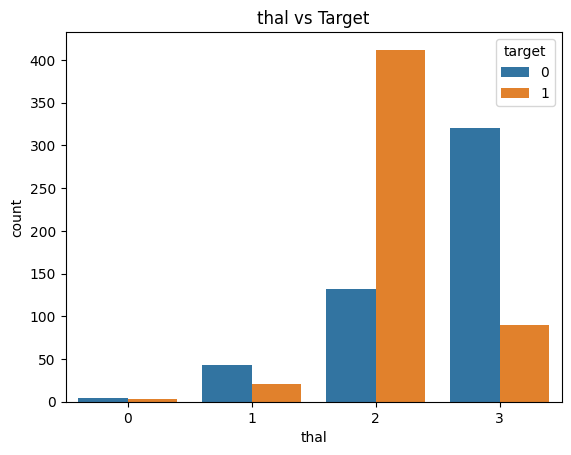

In [ ]:
# Categorical columns
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in cat_cols:
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'{col} vs Target')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    print()

In [ ]:
# Interactive scatter matrix
fig = px.scatter_matrix(df, dimensions=num_cols, color="target")
fig.update_layout(title="Scatter Matrix")
fig.show()

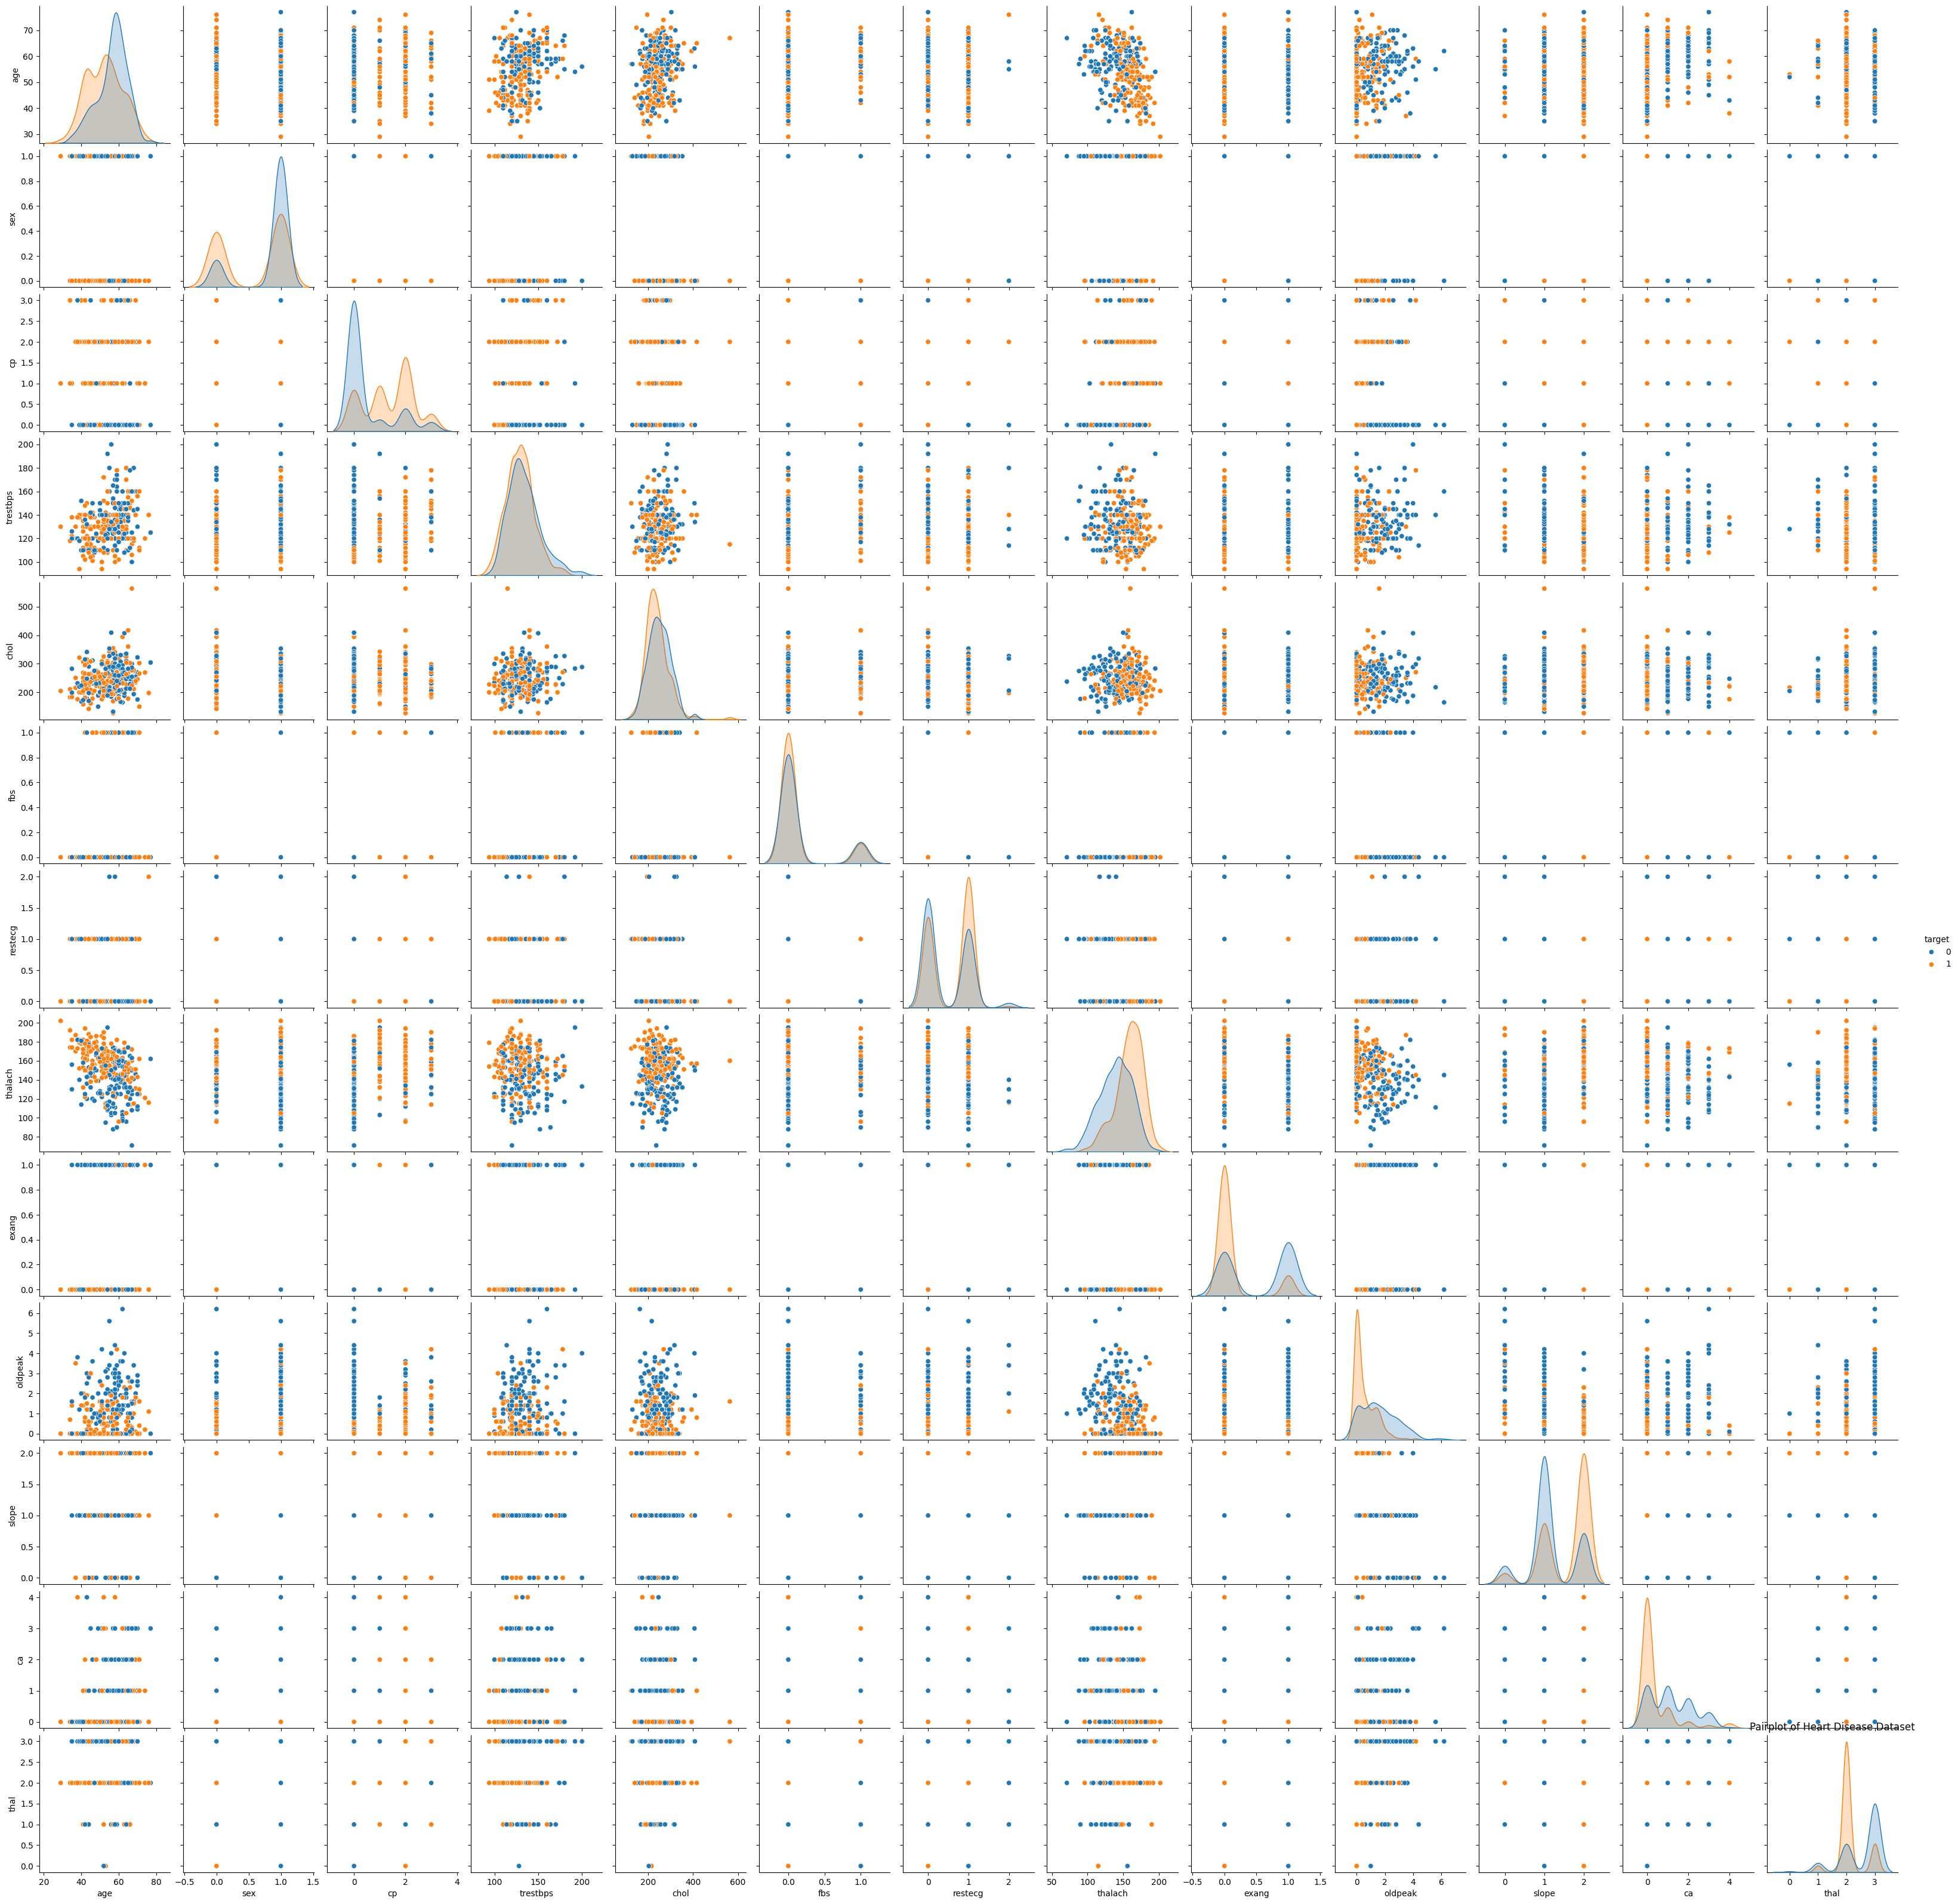

In [ ]:
# Pairplot
sns.pairplot(df, hue="target")
plt.title("Pairplot of Heart Disease Dataset")
plt.show()

In [ ]:
# Box Plot
for col in numerical_cols:
    fig = px.box(df, x="target", y=col, color="target",
                 title=f"{col} by Target", points="all")
    fig.show()
    print()

In [ ]:
# Violin Plot
for col in numerical_cols:
    fig = px.violin(df, x="target", y=col, color="target", box=True, points="all",
                    title=f"Violin Plot of {col} by Target")
    fig.show()
    print()

In [ ]:
# Parallel Categories
fig = px.parallel_categories(df, dimensions=['cp', 'thal', 'slope', 'ca', 'target'],
                             color="target", title="Parallel Categories: CP, Thal, Slope, CA, Target")
fig.show()

In [ ]:
# Sunburst
df_sun = df.copy()
df_sun['sex'] = df_sun['sex'].map({0: 'Female', 1: 'Male'})
df_sun['target'] = df_sun['target'].map({0: 'No Disease', 1: 'Disease'})

fig = px.sunburst(df_sun, path=['sex', 'cp', 'thal', 'target'], values=None,
                  color='target', title="Sunburst: Sex → CP → Thal → Target")
fig.show()